In [78]:
from symmer.symplectic import PauliwordOp, random_PauliwordOp, QuantumState, StabilizerOp
from symmer.projection import S3_projection
from symmer.utils import symplectic_cleanup
import numpy as np

In [79]:
P = random_PauliwordOp(3, 10)

List = []
for degree in range(10):
    exp_self = sum([(P**i).multiply_by_constant(1/np.math.factorial(i)) for i in range(degree+1)])
    List.append(sum(abs(exp_self.coeff_vec)))

In [80]:
from matplotlib import pyplot as plt

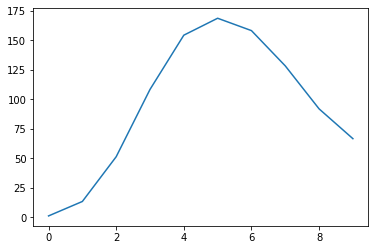

In [81]:
plt.plot(List)

In [82]:
P = random_PauliwordOp(3, 2)
Q = random_PauliwordOp(3, 1)
PQ = P*Q

print(P*Q - Q*P)
print()
print(PQ - PQ.conjugate)

-3.392+0.100j ZII

0.000-2.718j IZI +
0.000+0.100j ZII


In [83]:
def exp_P(pauli, angle):
    pauli.coeff_vec[0] = 1
    return (
        (pauli**0).multiply_by_constant(np.cos(angle)) + 
        (pauli).multiply_by_constant(1j*np.sin(angle))
    )

In [166]:
def entangling_block(theta,phi):
    P1 = PauliwordOp(['IZ'], [1])
    a1 = -(1/2)*(np.pi/2-phi)
    
    P2 = PauliwordOp(['XX'], [1])
    a2 = -theta/2
    
    P3 = PauliwordOp(['YY'], [1])
    a3 = -theta/2
    
    P4 = PauliwordOp(['ZZ'], [1])
    a4 = -np.pi/4
    
    P5 = PauliwordOp(['ZI'], [1])
    a5 = -np.pi/4
    
    P6 = PauliwordOp(['IZ'], [1])
    a6 = theta/4
    
    return exp_P(P1, a1)*exp_P(P2, a2)*exp_P(P3, a3)*exp_P(P4, a4)*exp_P(P5, a5)*exp_P(P6, a6)

In [172]:
def tensor(A, B):

    A_expanded_X = np.hstack([A.X_block, np.zeros_like(A.X_block)])
    A_expanded_Z = np.hstack([A.Z_block, np.zeros_like(A.Z_block)])
    A_pad = PauliwordOp(np.hstack([A_expanded_X, A_expanded_Z]), A.coeff_vec)
    
    B_expanded_X = np.hstack([np.zeros_like(B.X_block), B.X_block])
    B_expanded_Z = np.hstack([np.zeros_like(B.Z_block), B.Z_block])
    B_pad = PauliwordOp(np.hstack([B_expanded_X, B_expanded_Z]), B.coeff_vec)
    
    return A_pad * B_pad

In [197]:
anz = tensor(A = entangling_block(3,5), B = entangling_block(1,3))
ref = QuantumState([[0,1,0,1]])

print(anz * ref)

 0.5129240192-0.1517295496j |0101> +
 0.7574901860-0.3466711060j |0110> +
 0.0000000000-0.0762474658j |1001> +
-0.0167577741-0.1175600172j |1010>


In [198]:
proj = S3_projection(StabilizerOp(['ZZII', 'ZZZZ'], [1,-1]))
proj.perform_projection(operator=anz)

0.010-0.000j II +
0.000-0.058j IZ +
0.000-0.096j ZI +
-0.529+0.000j ZZ +
0.000-0.086j IX +
0.000-0.029j IY +
-0.794+0.000j ZX +
-0.264+0.000j ZY

In [173]:
anz = entangling_block(5,2)
print(anz)
ref = QuantumState([[0,1]])
print(anz * ref)

0.212-0.338j II +
0.144+0.300j IZ +
0.300+0.144j ZI +
0.338-0.212j ZZ +
0.084-0.084j XX +
-0.328+0.328j XY +
0.328-0.328j YX +
0.084-0.084j YY
 0.0300667749-0.2820642205j |01> +
 0.8247377443+0.4892273681j |10>


In [187]:
print(tensor(A = entangling_block(3,5), B = entangling_block(0.001,0.03)) * QuantumState([[1,0,0,1]]))

 0.1384603041-0.0272686808j |0101> +
-0.0001392160+0.0000231032j |0110> +
-0.0920916931+0.9856993879j |1001> +
 0.0001216168-0.0009824938j |1010>


In [146]:
proj = S3_projection(StabilizerOp(['ZZ'], [1], target_sqp='X'))

In [147]:
proj.perform_projection(operator=anz)

0.550-0.550j I +
0.444+0.444j Z

In [10]:
def A(theta, phi):
    return np.array(
        [
            [1,0,0,0],
            [0,np.cos(theta), np.exp(1j*phi)*np.sin(theta),0],
            [0,np.exp(-1j*phi)*np.sin(theta), -np.cos(theta),0],
            [0,0,0,1]
        ]
    )

In [15]:
P = np.array(
    [
        [1,0,0,0],
        [0,1,0,0],
        [0,0,1,0],
        [0,0,0,0]
    ]
)

In [18]:
print(P@A(2,0)@P)

[[ 1.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j -0.41614684+0.j  0.90929743+0.j  0.        +0.j]
 [ 0.        +0.j  0.90929743+0.j  0.41614684+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]]
